# 070 Introducing Scikit-Learn

> COM6018

*Copyright © 2023–2025 Jon Barker, University of Sheffield. All rights reserved.*


## 1. Introducing Scikit-learn

**Scikit-learn** is a Python package for machine learning that provides a consistent interface for a wide range of machine learning problems. It is built on top of the NumPy and pandas packages that we have already seen.

Scikit-learn comes with a number of built-in datasets that we can use to explore machine learning algorithms. In this tutorial, we will be using the iris dataset that we first saw in the Matplotlib lab class.

We will demonstrate the power of scikit-learn by training a simple machine learning model to classify the iris dataset. We will then use the model to predict the class of new samples. We will be using the **k-nearest neighbours** algorithm. This is a conceptually simple classification algorithm that classifies a new sample based on the class of the $k$ nearest samples in the training set. The number of neighbours, $k$, is a hyperparameter that we can set.

Although the k-nearest neighbour algorithm is just one approach to classification, if we use scikit-learn, the steps that we follow will be similar for other machine learning approaches. So, this tutorial will help us understand the basic workflow. In the next tutorial, we will look at how to use scikit-learn to train more advanced classifiers.

## 2. Loading the iris dataset

Before we can use scikit-learn, we need to import it. The package is called `sklearn` (note that there is no hyphen). We can import it using

In [1]:
import sklearn

Scikit-learn contains several built-in datasets that are available in the `datasets` module of the `sklearn` package. To load the iris dataset, we import the `datasets` module and call the `load_iris` function as follows,

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

The data is stored in a dictionary-like object that scikit-learn calls a **bunch**. It has fields for the data, target, feature names, etc. It also has an attribute called `DESCR` that contains a description of the dataset. Let us print that out,

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

The data are stored as a 2D array in the data field. The rows are the samples, and the columns are the features. The names of the features are stored in the `feature_names` field. We can convert the data to a pandas DataFrame using,

In [4]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Once the data are stored as a DataFrame we can use all the pandas methods that we have already seen. In particular, pandas has high-level data visualisation methods that we can use to explore the data. The grid of scatter plots that we produced in the Matplotlib lab class can be produced using a single line of code with the pandas `scatter_matrix` method,

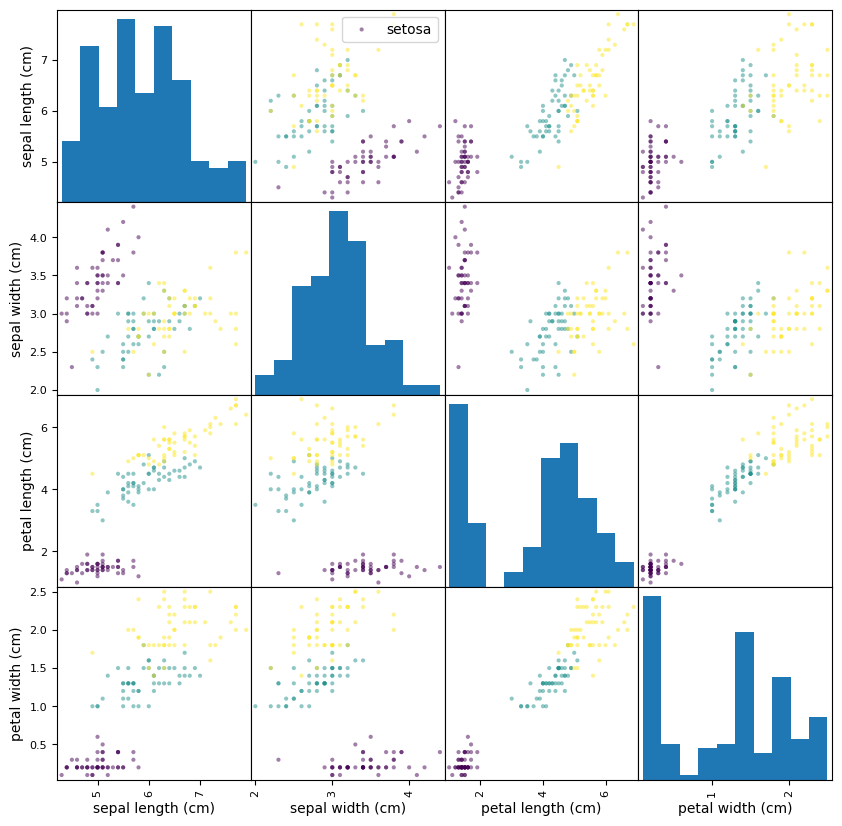

In [6]:
import matplotlib.pyplot as plt
ax = pd.plotting.scatter_matrix(df, c=iris.target, figsize=(10, 10))
ax[0,1].legend(iris.target_names)
plt.show()

Note that this is an improvement of the visualisation that we produced in the Matplotlib lab class because the diagonal elements (which only consider one feature) are displayed using histograms rather than scatter plots.

We can actually do a little better by using the popular `seaborn` package. This is an extension to Matplotlib that provides a number of high-level plotting functions. It has its own equivalent of the `scatter_matrix` method called `pairplot` that we can use,

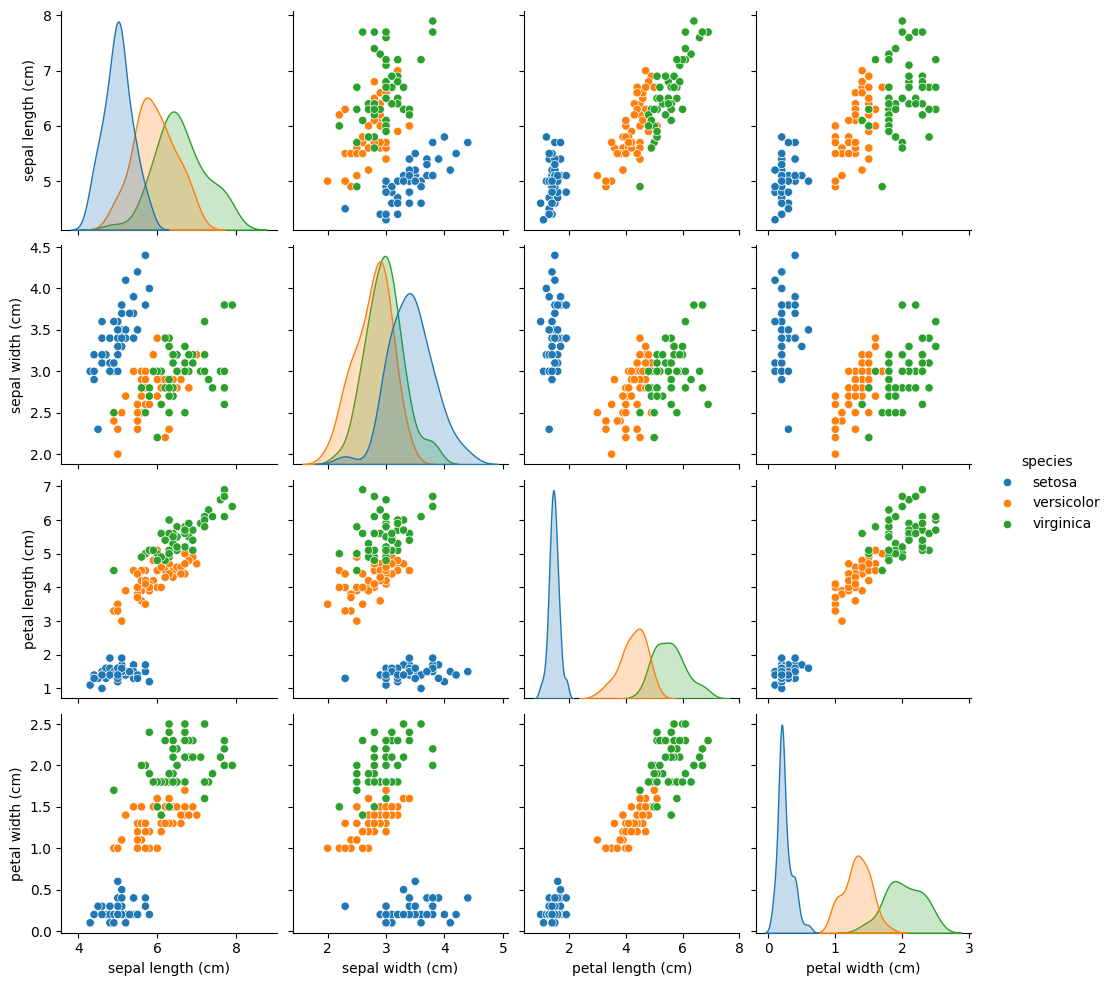

In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
df['species'] = iris.target_names[iris.target]
sns.pairplot(df, hue="species")
plt.show()

Note that in the above, the `seaborn` package is imported as `sns`. Again, this is just a convention, but it is a common one, and so it is a good idea to follow it.

## 3. Generating a training and testing set

Before we can train a machine learning model, we need to split our data into two sets: one for training and one for testing (i.e., evaluating the trained model). It is important that these datasets do not overlap -- that is, the samples in the testing set should be different from those in the training set. This is because we want to evaluate how well the model will generalise to new data. Note that this is important because when the model is deployed in the real world, it will be expected to perform well on data that it has not seen before.

Scikit-learn provides a number of functions for splitting data.  The simplest is the `train_test_split` function that takes the data and the corresponding target values as input and returns the data and target values for a separate training and testing set. The function also takes a number of optional arguments that allow us to control the size of the testing set and whether the data is shuffled before splitting. The default is to use 25% of the data for testing and to shuffle the data before splitting.

We can use the function as follows.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In the above, we have asked for 40% of the data to be used for testing. The `random_state` value is a **seed** that allows us to reproduce the same split each time we run the code. This is useful for debugging. (If random_state is not specified then the split will be different each time the code is run.)

```{footnote}
Random number generators do not generate truly random numbers. They generate pseudo-random numbers, i.e., a predictable sequence of numbers that has the appearance of being random. The position at which the generator starts in the sequence is governed by the **seed**. By setting the seed to some known value, we can ensure that the sequence of numbers is the same each time the code is run. This is useful for debugging because it allows us to reproduce the same results each time we run the code. It is also useful for reproducible research because it allows others to reproduce our results.
```

We can verify that the split has the expected number of items in the train and test sets by printing their shape,

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90, 4) (90,)
(60, 4) (60,)


## 4. Training a classifier

Scikit-learn provides a number of machine learning algorithms that we can use to train a classification **model**. The simplest is perhaps the k-nearest neighbours algorithm. This is a classification algorithm that classifies a new sample based on the class of the $k$ nearest samples in the training set. The number of neighbours, $k$, is a **hyperparameter** that we can tune to improve the model performance.

Scikit-learn uses a consistent interface for all its machine learning algorithms. Each machine learning algorithm is called an `estimator` and has a corresponding class that we can import. For k-nearest neighbours, this is the `KNeighborsClassifier` class. All estimator classes provide two main methods: `fit` and `predict`. The `fit` method is used to train the model (i.e., learn the model's parameter values) and the `predict` method is used to predict the class of new samples.

Let us now prepare a k-nearest neighbour classifier and train it using the training data,

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Note that the k-nearest neighbour classifier is an example of what is called a **non-parametric model**. This means that the model does not have a fixed number of parameters. In the case of k-nearest neighbours, the classification uses the samples in the training set directly. This means that the `fit` function does not actually have much to do for this particular classifier: It basically just stores the training data in the model. However, depending on the precise approach used to find the nearest neighbours, it may also do some preprocessing of the data (i.e., storing it in an efficient data structure).

## 5. Making predictions

Once a model has been trained with `fit`, we can use it to predict the class of new samples using the `predict` method. Here we will use data from our test set.

In [11]:
y_pred = clf.predict(X_test)

If we look at the output, we will see a sequence of integers corresponding to the class predictions for each test set sample,

In [12]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2]


We now want to see how many of these predictions are correct. We can do this by comparing the predicted class labels with the true class labels. This is performed using the `accuracy_score` function from the `metrics` module. The function simply takes the true labels and the predicted labels as inputs and returns the accuracy as a floating-point number between 0 and 1.

In [14]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In this case, we get an accuracy of 0.9333. This means that 93.33% of the predictions were correct. This is a pretty good result but we can perhaps do better by tuning the hyperparameters of the model. In the case of k-nearest neighbours the only hyperparameter is the number of neighbours, $k$. So in the next section, we will try different values of $k$ and see which gives the best accuracy.

## 6. Tuning hyperparameters

We can use a for loop to try different values of k and see which gives the best accuracy. Let us try values of k from 1 to 19 in steps of 2,

In [15]:
from sklearn import metrics

for k in range(1, 21, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(k, metrics.accuracy_score(y_test, y_pred))

1 0.9166666666666666
3 0.9333333333333333
5 0.95
7 0.9666666666666667
9 0.9666666666666667
11 0.9666666666666667
13 0.95
15 0.9333333333333333
17 0.9333333333333333
19 0.9333333333333333


Note that we have used a step size of 2 in the range function so that we only tried odd values of $k$. Odd values are preferred because with even values of k we can more easily obtain ties. For example, if $k$ is set to four, then the nearest neighbours can be evenly divided between two classes (i.e., two samples of one class and two of another).

We can see from the above output that the performance peaks at 96.67% for k in the range 7 to 11. Setting $k$ to the value of 9 is probably the best choice. This is a little better than the 93.33% score we achieved previously when $k$ was 3. Actually, although in absolute terms it is just an improvement of 3.33%, in relative terms it is equivalent to halving the number of errors (i.e., from 6.67% to 3.33%) -- viewed this way, we can see it is a very significant improvement.

We will not delve into the theory of $k$-nearest neighbour classification in this tutorial, but it is understood that increasing the value of $k$ has the effect of smoothing the decision boundary and reduces the risk of overfitting. It also reduces the sensitivity to outliers or erroneous points in the data. However, simply making $k$ larger and larger does not increase performance. At some point the decision boundary will become overly smooth, and performance will start to fall again. (This is an example of the so-called **bias-variance trade-off** and is a fundamental concept in machine learning.)

## 7. Analysing the model performance

We can get a better understanding of the performance of the model by looking at the pattern of errors the classifier makes. This is most easily seen by constructing a **confusion matrix**. This is a matrix showing how the samples in each class have been classified. The rows of the matrix represent the true class labels (i.e., the labels of the test data that has been input into the classifier), and the columns represent the predicted class labels (i.e., the labels that are output by the classifier). Each cell of the matrix contains the number of samples of a particular true class that were predicted to be of a certain output class.

To generate the confusion matrix, we can use the `confusion_matrix` function from the `metrics` module as follows,

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)

In [17]:
print(cm)

[[16  0  0]
 [ 0 22  1]
 [ 0  1 20]]


We can produce a better visualisation of the confusion matrix using the `ConfusionMatrixDisplay` class from the `metrics` module,

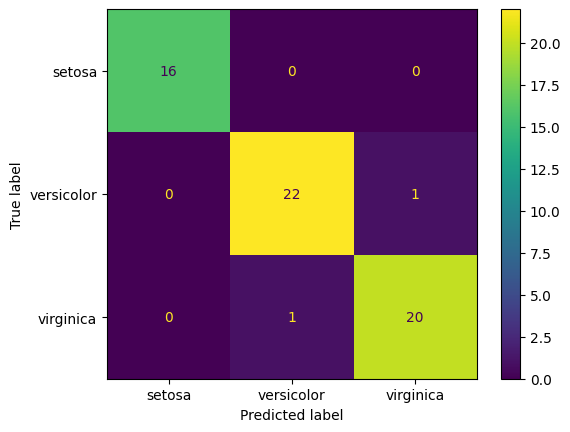

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()

To interpret the confusion matrix, we look at the *row* to see what the true class is and the *column* to see what the predicted class is. For example, the first row shows that there are 16 samples in the test set that are of class 0 (Setosa). Of these, 16 were correctly classified as Setosa. The second row shows that there are 24 samples in the test set that are of class 1 (Versicolor). Of these, 23 were correctly classified as Versicolor and 1 was incorrectly classified as Virginica. The third row shows that there are 20 samples in the test set that are of class 2 (Virginica). Of these, 20 were correctly classified as Virginica. The numbers on the diagonal of the matrix show the number of samples that were correctly classified. The off-diagonal elements show the number of samples that were incorrectly classified.

In this example, there are only two misclassified samples: one Versicolor sample was classified as Virginica and one Virginica sample was classified as Versicolor. This is a fairly good performance.

We don't really have enough data in our test set to get a very precise estimate of the model performance. In the next section, we will address this by using **leave-one-out cross-validation**.

## 8. Leave-one-out cross-validation

In leave-one-out cross-validation, we train the model on all but one of the samples and then test it on that remaining held-out sample. We repeat this for each sample in the dataset, that is, training with a different held-out sample each time and then testing that sample. We then accumulate the results over all these individual samples. This gives us a more accurate estimate of the model performance than using a single test set because we have effectively used every sample to test on. The downside is that it is computationally expensive because we have to train the model $N$ times, where $N$ is the number of samples in the dataset.

Leave-one-out is a special case of **cross-validation** where we split the data into $K$ equal-sized subsets called **folds** and then train the model $K$ times, each time using a different fold for testing and training with the rest. For example, if K is 10 then we split the data into 10 subsets, and train the model 10 times, each time using 9 of the 10 subsets for training and the remaining one for testing. Leave-one-out is the special case where K is equal to the number of samples in the dataset.

To perform cross-validation style training and testing in scikit-learn, we can use the `cross_val_predict` function from the `model_selection` module. This function takes the model, the data and the target values as input and returns the predicted target values. It also takes a `cv` argument that specifies the cross-validation strategy.

To perform leave-one-out cross-validation, we can use the `LeaveOneOut` class from the `model_selection` module as the strategy. We make an object from this class and pass it as the `cv` argument to the `cross_val_predict` function.

The complete code looks like this.

In [19]:
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

model = KNeighborsClassifier(n_neighbors=9)

cv = LeaveOneOut()

y_pred = cross_val_predict(model, iris.data, iris.target, cv=cv, n_jobs=-1)

cm = metrics.confusion_matrix(iris.target, y_pred)

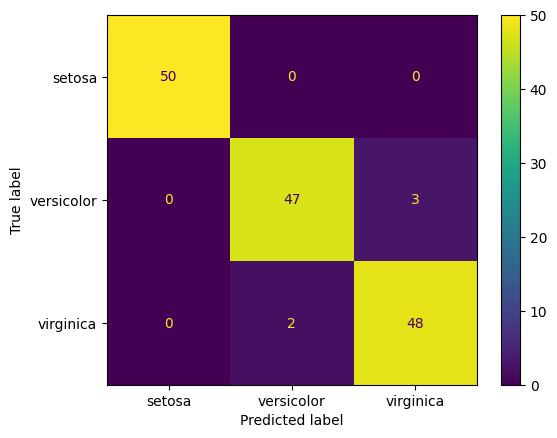

In [20]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()

plt.show()


To speed up processing, `cross_val_predict` can use multiple cores on the machine, and you can tell it how many to use by setting the `n_jobs` parameter. Note that in the above, the `n_jobs` parameter of the `cross_val_predict` function is set to -1. This special value tells scikit-learn to use all the available cores on the machine. This can significantly speed up the computation. For this small dataset, and the simple k-nearest neighbours algorithm, it does not make much difference, but for larger datasets it can make a big difference.

We can now see that all 150 samples in the dataset have been used for testing. The model has correctly classified 50+47+48=145 samples and has misclassified 3+2=5 samples. This gives an accuracy of 96.67%.

If we were not interested in the confusion matrix but just wanted to get the accuracy, we could use the `cross_val_score` function instead of `cross_val_predict`.

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, iris.data, iris.target, cv=cv, n_jobs=-1)

print('Accuracy = ',scores.mean()*100, '%')

Accuracy =  96.66666666666667 %


## 9. Summary

In this tutorial, we have introduced scikit-learn and used it to train and evaluate a simple classifier for the iris dataset. We have seen how to load the data, split them into training and testing sets, train a model, make predictions, and evaluate the model performance. We have also seen how to use cross-validation to get a more accurate estimate of the model performance.

In the next tutorial, we will look at how to use scikit-learn to train and tune more advanced classifiers. As we shall see, the real strength of scikit-learn is that the basic workflow will be the same regardless of the type of classifier we use. This makes it a very easy package to learn and is one of the reasons it has become so popular.

*Copyright © 2023–2025 Jon Barker, University of Sheffield. All rights reserved.*